In [17]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
API_URL = "https://api.coingecko.com/api/v3/coins/markets"
PARAMS = {
    'vs_currency': 'usd',
    'order': 'market_cap_desc',
    'per_page': 10,
    'page': 1,
    'sparkline': 'false'
}

In [19]:
def fetch_crypto_data(api_url, params):
    """
    Fetch cryptocurrency data from the CoinGecko API.
    
    Parameters:
    api_url (str): The API endpoint URL.
    params (dict): The parameters for the API request.

    Returns:
    DataFrame: A pandas DataFrame containing the cryptocurrency data.
    """
    try:
        response = requests.get(api_url, params=params)
        response.raise_for_status()
        data = response.json()
        return pd.DataFrame(data)
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
        return pd.DataFrame()

In [20]:
# Test fetching data
crypto_df = fetch_crypto_data(API_URL, PARAMS)
print(crypto_df.head())

            id symbol      name  \
0      bitcoin    btc   Bitcoin   
1     ethereum    eth  Ethereum   
2       tether   usdt    Tether   
3  binancecoin    bnb       BNB   
4       solana    sol    Solana   

                                               image  current_price  \
0  https://coin-images.coingecko.com/coins/images...   61147.000000   
1  https://coin-images.coingecko.com/coins/images...    3314.900000   
2  https://coin-images.coingecko.com/coins/images...       0.999018   
3  https://coin-images.coingecko.com/coins/images...     565.730000   
4  https://coin-images.coingecko.com/coins/images...     127.620000   

      market_cap  market_cap_rank  fully_diluted_valuation  total_volume  \
0  1206348693401                1            1284910703643   26609767654   
1   405739686812                2             405739686812   17143097125   
2   112830971261                3             112830971261   44668927076   
3    87128793001                4              87128793001

In [21]:
def visualize_data(df):
    """
    Visualize the cryptocurrency data using seaborn and matplotlib.
    
    Parameters:
    df (DataFrame): The DataFrame containing the cryptocurrency data.
    """
    plt.figure(figsize=(12, 6))
    sns.barplot(x='name', y='current_price', data=df)
    plt.title('Top 10 Cryptocurrencies by Market Cap')
    plt.xlabel('Cryptocurrency')
    plt.ylabel('Current Price (USD)')
    plt.xticks(rotation=45)
    plt.show()

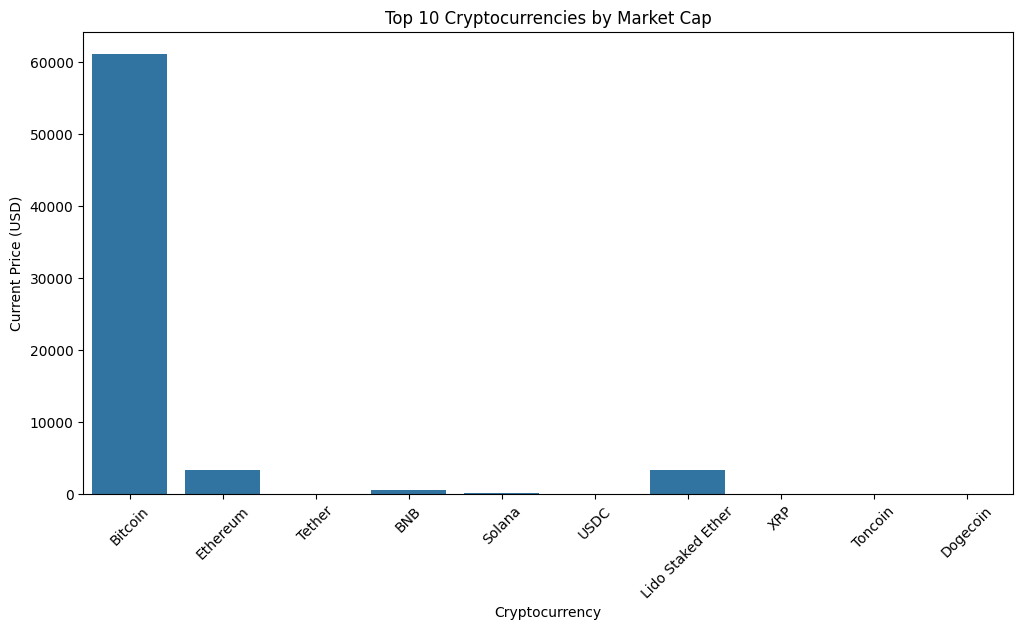

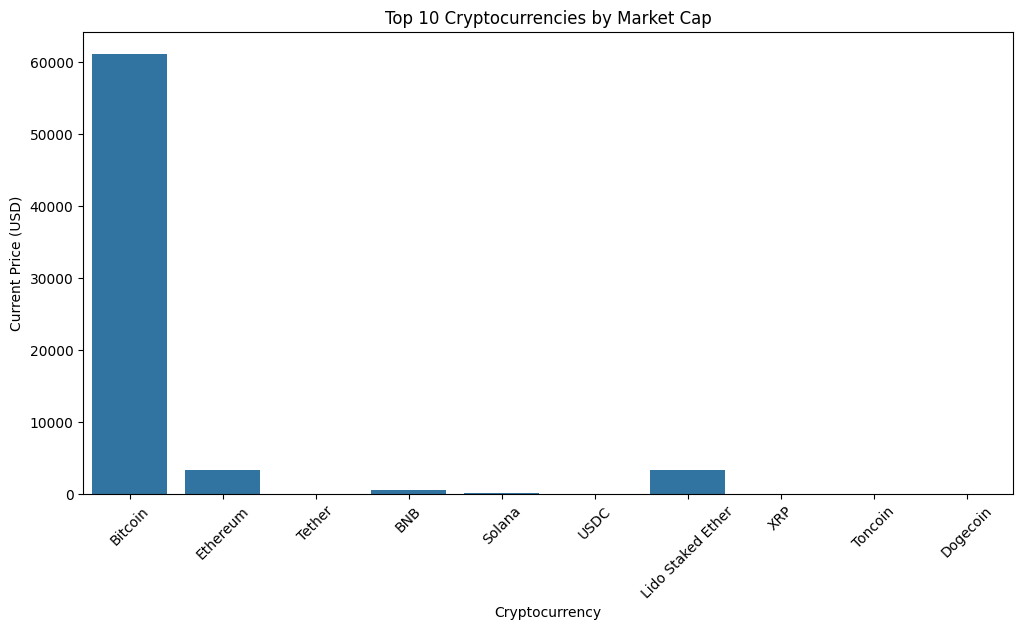

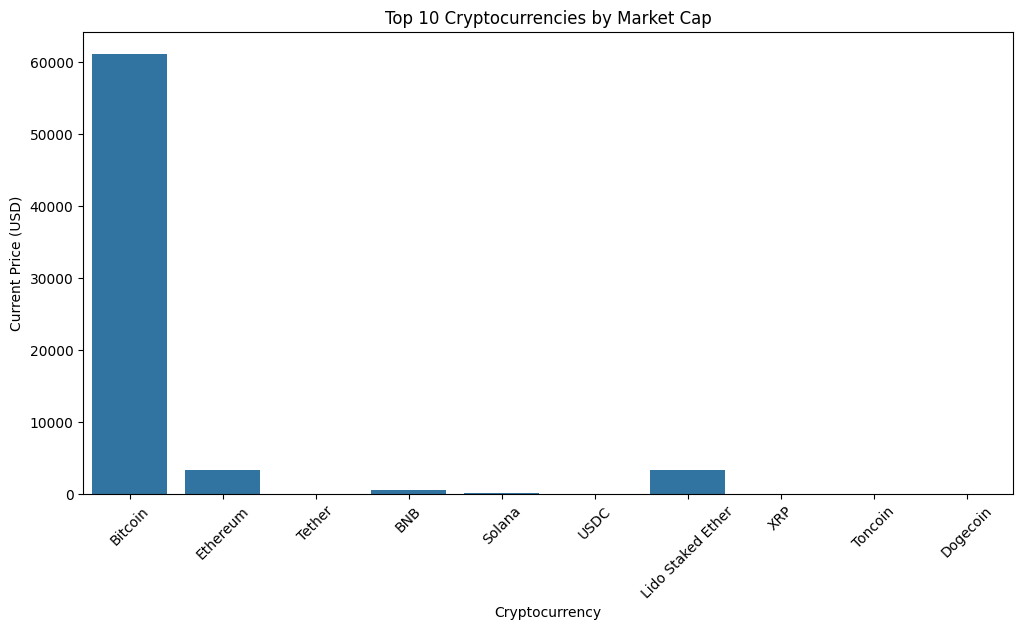

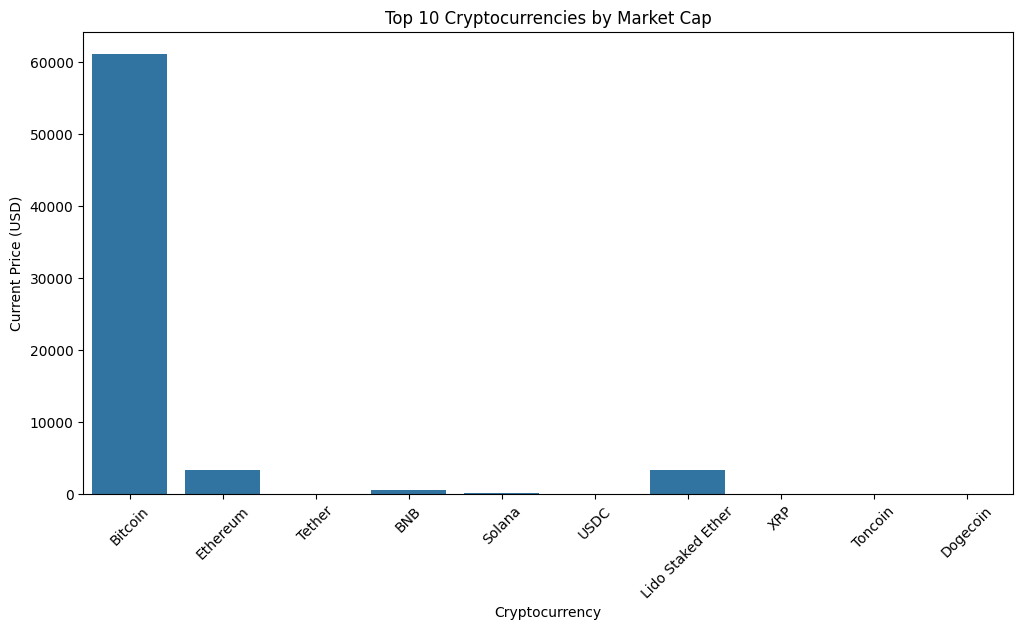

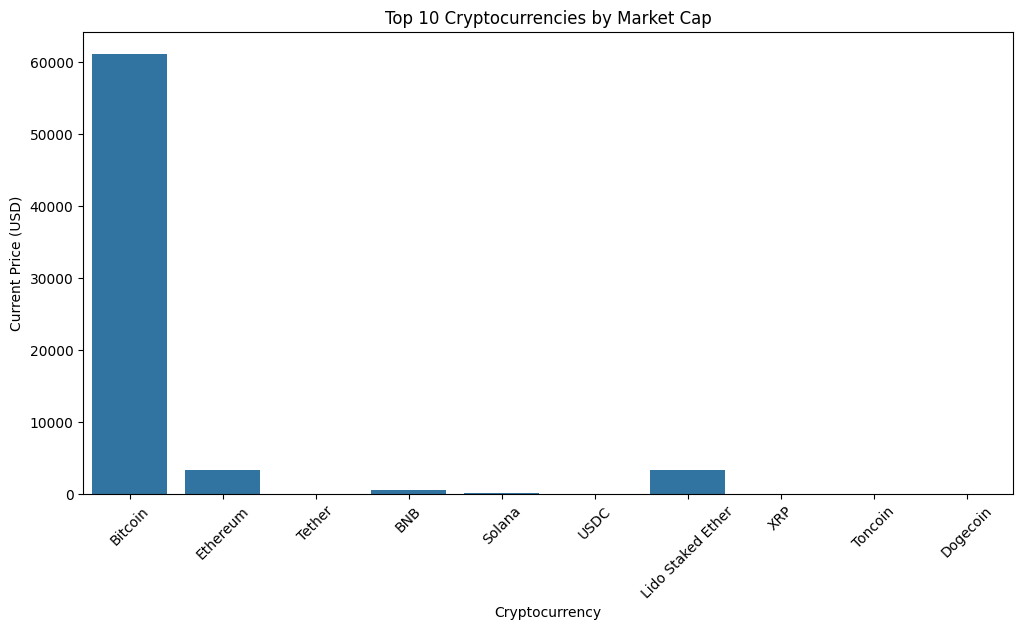

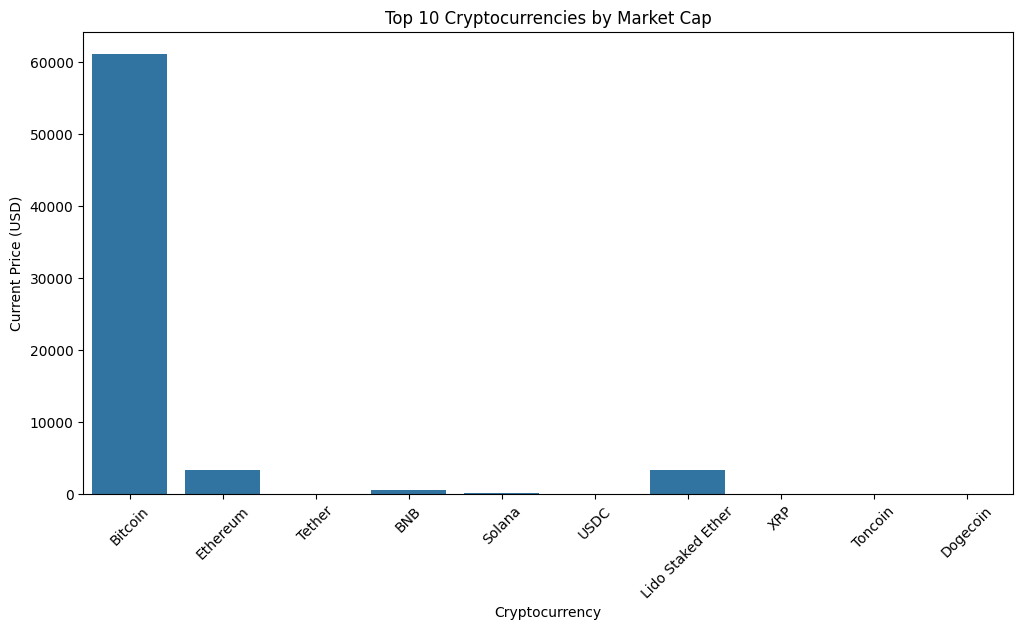

In [22]:
# Test visualization
if not crypto_df.empty:
    visualize_data(crypto_df)
else:
    print("No data to display.")

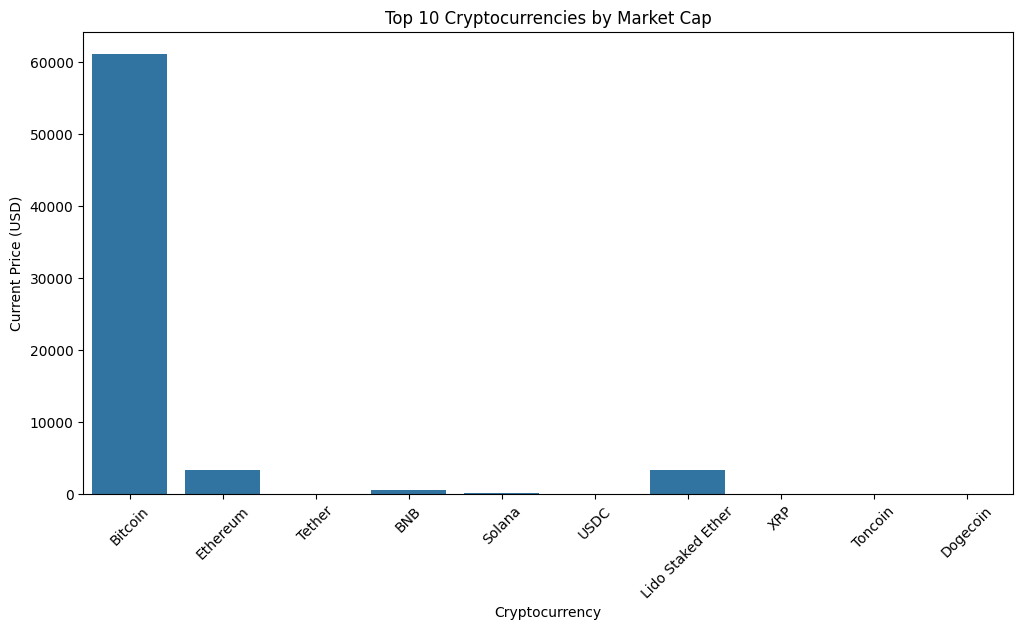

In [23]:
def main():
    """
    Main function to execute the crypto data fetching and visualization.
    """
    crypto_df = fetch_crypto_data(API_URL, PARAMS)
    if not crypto_df.empty:
        visualize_data(crypto_df)
    else:
        print("No data to display.")

if __name__ == "__main__":
    main()